In [1]:
import numpy as np
import pandas as pd


# Comparisons, Masks, and Boolean Logic

**Boolean masks** are used **to examine and manipulate values** within NumPy arrays.
**Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion.**

e.g.
*   count all values greater than a certain value
*   remove all outliers that are above some threshold

In NumPy, **Boolean masking** is often the most efficient way to accomplish these types of tasks.

## Example: Counting Rainy Days

Imagine you have a series of data that represents the amount of precipitation each day for a year in a given city.

This data contains daily rainfall statistics for the city of Seattle in 2014, using Pandas 

In [3]:
# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\Other Datasets\Seattle2014.csv")['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.

The histogram of rainy days

In [4]:
inches

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134,
       0.83858268, 0.05905512, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01968504, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3503937 , 0.8503937 , 0.        ,
       0.09055118, 0.07874016, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2007874 , 0.01968504,
       0.72047244, 0.66929134, 0.18110236, 0.07086614, 0.37007874,
       0.46062992, 1.03937008, 0.57086614, 0.5984252 , 0.03937008,
       0.11811024, 0.11023622, 0.0984252 , 0.24015748, 0.51181102,
       0.01181102, 0.        , 0.        , 0.        , 0.01968504,
       0.7519685 , 0.42125984, 0.6496063 , 1.83858268, 0.11811024,
       0.        , 1.27165354, 0.16929134, 0.74015748, 0.        ,
       0.        , 0.01968504, 0.27165354, 0.31889764, 1.09055

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

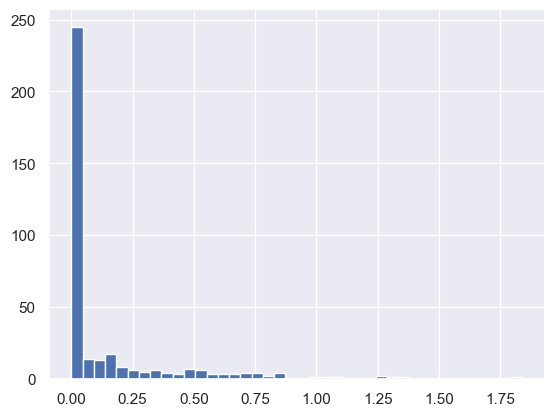

In [6]:
plt.hist(inches, 40);

## **Observation???**

###The vast majority of days in Seattle saw near zero measured rainfall in 2014.

But this **doesn't do a good job of conveying some information** we'd like to see: for example,

 **how many rainy days were there in the year?** 
 
 **What is the average precipitation on those rainy days?** 
 
 **How many days were there with more than half an inch of rain?**

## Comparison Operators as ufuncs

NumPy implements comparison operators such as **``<`` (less than) and ``>`` (greater than)** as element-wise ufuncs.

The **result** of these comparison operators is always an array with a **Boolean data type**.
All six of the standard comparison operations are available:

In [7]:
x = np.array([1, 2, 3, 4, 5])

In [8]:
x < 3  # less than

array([ True,  True, False, False, False])

In [9]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [10]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [11]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [12]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [13]:
x == 3  # equal

array([False, False,  True, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [14]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

The **comparison operators are implemented as ufuncs** in NumPy; for example, when you write ``x < 3``, internally NumPy uses ``np.less(x, 3)``.
    A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

Comparison operators working with 2D

In [15]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [16]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

Given a Boolean array, there are a host of useful operations you can do.
We'll work with ``x``, the two-dimensional array we created earlier.

In [17]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

To count the number of ``True`` entries in a Boolean array, **``np.count_nonzero``** is useful:

In [18]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

We see that there are eight array entries that are less than 6.
Another way to get at this information is to use ``np.sum``; in this case, ``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``:

In [19]:
np.sum(x < 6)

8

The benefit of ``sum()`` is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [20]:
# how many values less than 6 in each Column?
np.sum(x < 6, axis=0)


array([2, 2, 2, 2])

Checking whether any or all the values are true, we can use (you guessed it) **``np.any``** or **``np.all`**`:

In [21]:
# are there any values greater than 8?
np.any(x > 8)

True

In [22]:
# are there any values less than zero?
np.any(x < 0)

False

In [23]:
# are all values less than 10?
np.all(x < 10)

True

In [24]:
# are all values equal to 6?
np.all(x == 6)

False

``np.all`` and ``np.any`` can be used along particular axes as well. For example:

In [25]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

Here all the elements in the first and third rows are less than 8, while this is not the case for the second row.

Be sure that you are using ``np.sum()``, ``np.any()``, and ``np.all()`` while working with numpy arrays!

### Boolean operators
Find
- All days with rain less than four inches?
- or all days with rain greater than two inches?

- Find all days with rain less than four inches and greater than one inch?

This is accomplished through Python's *bitwise logic operators*, ``&``, ``|``, ``^``, and ``~``.


For example, we can address this sort of compound question as follows:

In [26]:
np.sum((inches > 0.5) & (inches < 1))

29

In [27]:
np.sum((inches<4)&(inches>1))

7

So we see that there are 29 days with rainfall between 0.5 and 1.0 inches.

Note that the **parentheses here are important –because of operator precedence rules.**



In [28]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

Answering weather information by combining masking with aggregations:

1. Number days without rain
2. Number days with rain
3. Days with more than 0.5 inches
4. Rainy days with < 0.2 inches

In [29]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Using Boolean Arrays as Masks



In [30]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

Simple condition

In [31]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

**masking operation**
Selecting values based on index return by applying filter


In [32]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

**Output**: one-dimensional array filled with all the values that meet this condition; 

i.e.all the values in positions at which the mask array is ``True``



**Let's Compute** some relevant statistics on our Seattle rain data:

In [33]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [34]:
print(np.sum(rainy))
print(np.sum(summer))
print(inches[summer])

150
89
[0.         0.         0.         0.         0.07086614 0.09055118
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01181102
 0.75984252 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01968504 0.
 0.         0.         0.         0.         0.         0.
 0.         0.01968504 0.5        0.8503937  0.         0.03937008
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.33070866 0.0511811  0.         0.11811024
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01968504 0.01181102 0.        ]


By combining Boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions for our dataset.


## Aside: Using the Keywords and/or Versus the Operators &/|

One common point of confusion is the difference between the keywords ``and`` and ``or`` on one hand, and the operators ``&`` and ``|`` on the other hand.
When would you use one versus the other?

The difference is this: ``and`` and ``or`` gauge the truth or falsehood of *entire object*, while ``&`` and ``|`` refer to *bits within each object*.

When you use ``and`` or ``or``, it's equivalent to asking Python to treat the object as a single Boolean entity.
In Python, all nonzero integers will evaluate as True. Thus:

In [35]:
bool(42), bool(0)

(True, False)

In [36]:
bool(42 and 0)

False

In [37]:
bool(42 or 0)

True

When you use ``&`` and ``|`` on integers, the expression operates on the bits of the element, applying the *and* or the *or* to the individual bits making up the number:

In [38]:
bin(42)

'0b101010'

In [39]:
bin(59)

'0b111011'

In [40]:
bin(42 & 59)

'0b101010'

In [41]:
bin(42 | 59)

'0b111011'

Notice that the corresponding bits of the binary representation are compared in order to yield the result.

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where ``1 = True`` and ``0 = False``, and the result of ``&`` and ``|`` operates similarly to above:

In [42]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

Using ``or`` on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [43]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when doing a Boolean expression on a given array, you should use ``|`` or ``&`` rather than ``or`` or ``and``:

In [44]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

Trying to evaluate the truth or falsehood of the entire array will give the same ``ValueError`` we saw previously:

In [45]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

So remember this: **``and`` and ``or`` perform a single Boolean evaluation on an entire object, while ``&`` and ``|`` perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object.**
For Boolean NumPy arrays, the latter is nearly always the desired operation.